In [1]:
# importar bibliotecas
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.datasets import make_blobs, make_moons, make_circles  # Importar funções para gerar datasets
from sklearn.decomposition import PCA  # Importar PCA

import seaborn as sns
from sklearn.decomposition import PCA


import matplotlib
matplotlib.use('TkAgg')  # Or 'Qt5Agg', 'GTK3Agg', etc.
import matplotlib.pyplot as plt
%matplotlib inline




Importação de Bibliotecas:

pandas e numpy: Para manipulação de dados.
matplotlib.pyplot: Para visualização.
sklearn.cluster: Para algoritmos de clusterização (K-means, AgglomerativeClustering, DBSCAN).
sklearn.preprocessing: Para padronização de dados (StandardScaler).
sklearn.metrics: Para avaliação de clusterização (silhouette_score).
sklearn.datasets: Para gerar dados de exemplo, se necessário.
Pré-processamento dos Dados:

Escalonamento (Padronização): O K-means é sensível à escala dos dados. Padronizamos os dados usando StandardScaler para que cada coluna tenha média 0 e desvio padrão 1. Isso garante que todas as colunas contribuam igualmente para o cálculo da distância entre os pontos. O resultado é armazenado em df_scaled, que é um novo DataFrame com os dados escalonados.
Método do Cotovelo:

Objetivo: Ajudar a determinar o número ideal de clusters (K) para o algoritmo K-means.
Como Funciona:
Calcula a Soma dos Quadrados Intra-Clusters (WCSS) para diferentes valores de K. O WCSS é a soma das distâncias quadráticas de cada ponto ao centroide do seu cluster.
Plota o WCSS em função de K.
O número ideal de clusters é frequentemente encontrado no ponto onde o gráfico se parece com um "cotovelo" (a taxa de diminuição do WCSS diminui acentuadamente).
Interpretação: No código, testamos valores de K de 1 a 10. O gráfico resultante mostrará como o WCSS varia com K. Você deve procurar o valor de K onde adicionar mais clusters não reduz significativamente o WCSS.
Coeficiente de Silhueta:

Objetivo: Avaliar a qualidade da clusterização.
Como Funciona:
Para cada ponto, calcula a similaridade com o seu próprio cluster (coesão) e a similaridade com o cluster vizinho mais próximo (separação).
O coeficiente de silhueta varia de -1 a +1.
Próximo de +1: O ponto está bem agrupado no seu cluster.
Próximo de 0: O ponto está próximo da fronteira entre dois clusters.
Próximo de -1: O ponto pode estar atribuído ao cluster errado.
Interpretação: Calcula-se a silhueta média para diferentes valores de K. O K com maior silhueta média indica uma melhor separação dos clusters.
Aplicando o K-means:

Escolha de K: Com base na análise do Método do Cotovelo e do Coeficiente de Silhueta, você escolhe o número de clusters (K). No exemplo, estou supondo que você escolheu K=3, mas você deve escolher o valor apropriado para seus dados.
Inicialização: O parâmetro init='k-means++' é usado para inicializar os centroides dos clusters de forma inteligente, o que ajuda a obter melhores resultados e convergência mais rápida.
Ajuste e Predição:
kmeans.fit_predict(df_scaled): Ajusta o modelo K-means aos dados escalonados (df_scaled) e retorna os rótulos dos clusters para cada ponto.
df_epds['Cluster'] = y_kmeans: Adiciona os rótulos dos clusters como uma nova coluna chamada 'Cluster' ao DataFrame original df_epds. É importante adicionar ao DataFrame original para que você possa analisar os clusters em relação aos dados originais.
Exibição de Resultados: Imprime as primeiras linhas do DataFrame df_epds com a nova coluna 'Cluster'. Também calcula e imprime a média de cada coluna para cada cluster, o que ajuda a entender as características dos clusters.
Visualização dos Clusters:

Limitação: O K-means funciona com dados de qualquer número de dimensões, mas a visualização direta é possível apenas em 2 ou 3 dimensões. Como o seu df_epds tem 10 colunas, não podemos visualizar os clusters em um único gráfico 2D ou 3D.
Solução: O código inclui um exemplo de como visualizar os clusters se você tivesse apenas 2 colunas. Além disso, para o caso de 10 dimensões, ele gera gráficos de dispersão para alguns pares de colunas ('EPDS_1' vs 'EPDS_2', 'EPDS_3' vs 'EPDS_4', etc.). Isso pode dar alguma intuição sobre como os clusters se separam em diferentes subespaços dos dados.
Interpretação: Se você pudesse visualizar os clusters em 2D, você esperaria ver pontos da mesma cor agrupados juntos, formando os clusters. Os centroides dos clusters seriam marcados com 'X' vermelho.
Outros Algoritmos de Clusterização:

Clustering Hierárquico Aglomerativo:
Abordagem: Constrói uma hierarquia de clusters, começando com cada ponto em seu próprio cluster e, em seguida, fundindo iterativamente os clusters mais próximos.
Parâmetros:
n_clusters: Número de clusters a serem formados.
linkage: Critério usado para determinar quais clusters fundir ('ward', 'complete', 'average', 'single'). 'ward' tenta minimizar a variância dentro dos clusters.
Vantagens: Não requer a especificação do número de clusters antecipadamente (embora você precise especificá-lo para obter os rótulos finais).
Desvantagens: Pode ser computacionalmente caro para grandes conjuntos de dados.
DBSCAN (Clustering Espacial Baseado em Densidade de Aplicações com Ruído):
Abordagem: Agrupa pontos próximos uns dos outros (pontos com muitos vizinhos próximos) e marca pontos isolados como ruído.
Parâmetros:
eps: Raio da vizinhança em torno de um ponto.
min_samples: Número mínimo de pontos em uma vizinhança para um ponto ser considerado um ponto central.
Vantagens: Pode descobrir clusters de formas arbitrárias e é robusto a outliers.
Desvantagens: Requer a escolha de parâmetros significativos (eps e min_samples), que podem ser difíceis de determinar. Desempenho pode degradar em dados de alta dimensionalidade.
Análise Didática:

K-means:
É um algoritmo de clusterização particional. Ele divide os dados em K clusters, onde cada ponto pertence ao cluster com o centroide mais próximo.
É simples, eficiente e amplamente utilizado.
Requer que você especifique o número de clusters (K) antecipadamente.
É sensível à escala dos dados e à inicialização dos centroides.
Clustering Hierárquico Aglomerativo:
Constrói uma hierarquia de clusters. Você pode escolher o número de clusters cortando a hierarquia em um determinado nível.
Pode ser usado para visualizar relacionamentos hierárquicos entre os clusters (dendrogramas).
Diferentes métodos de ligação (linkage) definem como a distância entre dois clusters é calculada.
DBSCAN:
Agrupa pontos com base na densidade. Clusters são regiões densas separadas por regiões esparsas.
Pode descobrir clusters de formas arbitrárias e identificar outliers (ruído).
Requer a escolha de parâmetros que podem ser difíceis de determinar.
Interpretação dos Resultados:

Após aplicar o K-means (ou outro algoritmo), você terá uma nova coluna ('Cluster', 'Hierarchical_Cluster' ou 'DBSCAN_Cluster') em seu DataFrame df_epds que indica a qual cluster cada linha (paciente, no seu caso) foi atribuída.
Você pode analisar as características dos clusters calculando estatísticas descritivas (média, mediana, desvio padrão) das colunas 'EPDS_1' a 'EPDS_10' para cada cluster. Isso ajudará você a entender o que diferencia os grupos de pacientes.
Por exemplo, você pode encontrar um cluster de pacientes com pontuações consistentemente altas em todas as colunas EPDS, o que pode indicar um grupo com sintomas mais graves. Outro cluster pode ter pontuações baixas, indicando sintomas menos graves.
A visualização (se possível) pode ajudar a confirmar se os clusters são bem separados e compactos.
Lembre-se de que a escolha do algoritmo de clusterização e seus parâmetros depende dos seus dados e dos seus objetivos.  O K-means é um bom ponto de partida, mas o Clustering Hierárquico e o DBSCAN podem ser mais apropriados em algumas situações.  A análise exploratória dos dados e a experimentação com diferentes métodos são importantes para obter os melhores resultados.

In [2]:
# fazer a leitura do arquivo
caminho_arquivo = 'C:/Users/Emille/Documents/UNIFESP/MATÉRIAS/Tópicos em Ciência de Dados para Neurociência/maternal health.xlsx'
df = pd.read_excel(caminho_arquivo)
df

,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_Autre,Marital_status_edit,Education,Gestationnal_age,...,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
0,355,1,1,1,31,3,NaN,3,3,34.0,...,2.0,1.0,2.0,6.0,1.0,2.0,NaN,09:30:00,0,1
1,221,1,1,1,26,2,NaN,2,4,39.5,...,5.0,1.0,5.0,NaN,7.0,2.0,7.0,08:00:00,0,1
2,160,1,1,1,28,2,NaN,2,4,39.0,...,2.0,2.0,2.0,1.0,5.0,4.0,2.0,09:30:00,0,1
3,315,1,1,1,30,2,NaN,2,5,39.1,...,1.0,3.0,2.0,1.0,NaN,1.0,1.0,09:00:00,0,1
4,129,1,1,1,26,2,NaN,2,2,40.3,...,4.0,3.0,2.0,1.0,6.0,5.0,NaN,12:00:00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,93,1,1,1,23,1,NaN,1,3,42.0,...,7.0,6.0,2.0,2.0,7.0,6.0,2.0,10:00:00,4,5
406,289,1,1,1,28,2,NaN,2,3,38.0,...,2.0,2.0,2.0,7.0,NaN,3.0,6.0,12:00:00,4,5
407,279,1,1,1,29,2,NaN,2,5,40.0,...,NaN,6.0,3.0,6.0,5.0,4.0,7.0,08:00:00,4,5
408,312,1,1,1,25,2,NaN,2,3,38.0,...,4.0,5.0,1.0,1.0,3.0,1.0,2.0,10:00:00,5,5


In [3]:
df.describe()

,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_edit,Education,Gestationnal_age,Type_pregnancy,...,IBQ_R_VSF_9_bb1,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
count,410.000000,410.0,410.0,410.0,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,...,376.000000,375.000000,394.000000,329.000000,347.000000,395.000000,378.000000,326.000000,410.000000,410.000000
mean,205.500000,1.0,1.0,1.0,30.197561,2.002439,1.982927,4.080488,39.114146,1.012195,...,3.960106,3.360000,3.195431,2.477204,2.927954,4.326582,4.246032,3.634969,1.439024,3.041463
std,118.501055,0.0,0.0,0.0,4.362262,0.359970,0.225948,1.001642,1.900777,0.109890,...,1.973424,1.969283,1.773391,1.481676,2.121456,1.839272,1.725237,2.176491,1.589218,1.397076
min,1.000000,1.0,1.0,1.0,19.000000,1.000000,1.000000,1.000000,26.500000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,103.250000,1.0,1.0,1.0,27.000000,2.000000,2.000000,3.000000,38.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.000000
50%,205.500000,1.0,1.0,1.0,30.000000,2.000000,2.000000,4.000000,39.200000,1.000000,...,4.000000,3.000000,3.000000,2.000000,2.000000,4.000000,4.000000,3.000000,1.000000,4.000000
75%,307.750000,1.0,1.0,1.0,33.000000,2.000000,2.000000,5.000000,40.400000,1.000000,...,6.000000,5.000000,4.000000,3.000000,5.000000,6.000000,6.000000,6.000000,2.000000,4.000000
max,410.000000,1.0,1.0,1.0,47.000000,6.000000,3.000000,5.000000,43.000000,2.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,10.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Participant_number          410 non-null    int64  
 1   Type_parents                410 non-null    int64  
 2   Birth_1mth_M_inclusion      410 non-null    int64  
 3   Birth_12mth_M_inclusion     410 non-null    int64  
 4   Age                         410 non-null    int64  
 5   Marital_status              410 non-null    int64  
 6   Marital_status_Autre        2 non-null      object 
 7   Marital_status_edit         410 non-null    int64  
 8   Education                   410 non-null    int64  
 9   Gestationnal_age            410 non-null    float64
 10  Type_pregnancy              410 non-null    int64  
 11  sex_baby1                   410 non-null    int64  
 12  CBTS_M_3                    410 non-null    int64  
 13  CBTS_M_4                    410 non

In [5]:
# Lista das colunas que você quer selecionar
colunas_epds = ['EPDS_1', 'EPDS_2', 'EPDS_3', 'EPDS_4', 'EPDS_5', 'EPDS_6', 'EPDS_7', 'EPDS_8', 'EPDS_9', 'EPDS_10']

# Usa intersection para obter colunas existentes, mais eficiente
colunas_existentes = list(set(colunas_epds).intersection(df.columns))

# Cria um novo DataFrame contendo apenas as colunas EPDS, se existirem
if colunas_existentes:
    df_epds = df[colunas_existentes]
    print("Novo DataFrame df_epds criado com sucesso:")
    #print(df_epds.head())  # Exibe as primeiras linhas do novo DataFrame
else:
    print("Erro: Nenhuma coluna EPDS foi encontrada no DataFrame original.")

Novo DataFrame df_epds criado com sucesso:


In [6]:
df_epds.head()

,EPDS_7,EPDS_10,EPDS_6,EPDS_9,EPDS_1,EPDS_4,EPDS_8,EPDS_5,EPDS_2,EPDS_3
0,0,0,1,0,0,2,0,0,0,2
1,0,0,1,0,0,0,0,1,0,1
2,0,0,1,0,0,0,1,0,0,0
3,0,0,2,0,0,2,0,2,0,1
4,0,0,1,1,0,2,0,0,0,2


In [7]:
# 1. Pré-processamento dos Dados
# Padronizar os dados é importante para que todas as colunas contribuam igualmente para a distância
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_epds)
df_scaled = pd.DataFrame(df_scaled, columns=df_epds.columns) # Converte para DataFrame novamente

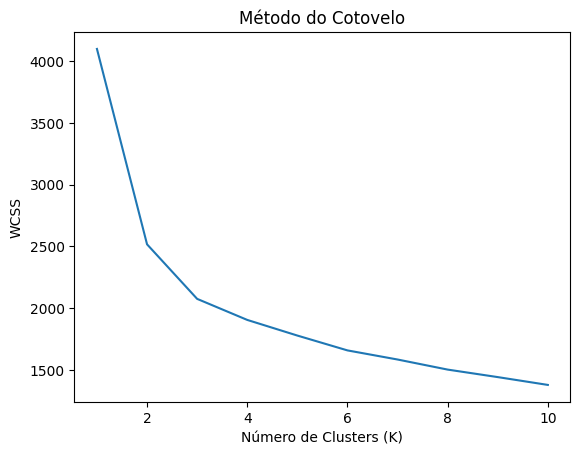

In [8]:
# 2. Método do Cotovelo para Determinar o Número Ótimo de Clusters (K)
#   - Calcula a soma dos quadrados intra-clusters (WCSS) para diferentes valores de K.
#   - Plota o WCSS em função de K.
#   - O "cotovelo" no gráfico indica um valor de K possivelmente bom.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS')
plt.show()

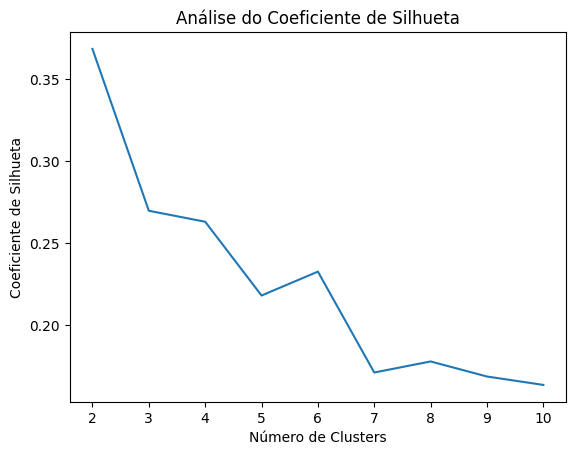

In [9]:
# 3. Coeficiente de Silhueta para Avaliar a Qualidade da Clusterização
# Calcula a silhueta para diferentes valores de K e plota.
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Número de Clusters")
plt.ylabel("Coeficiente de Silhueta")
plt.title("Análise do Coeficiente de Silhueta")
plt.show()

In [10]:
# 4. Aplicando o K-means com o K Escolhido
# Suponha que, após analisar o método do cotovelo e a silhueta, você escolheu K=3
k = 2
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(df_scaled)

# Adiciona os rótulos dos clusters ao DataFrame original (não ao df_scaled)
df_epds['Cluster'] = y_kmeans

# Exibe os resultados
print("Resultados do K-means:")
print(df_epds.head())

# Calcula a média das colunas por cluster
cluster_means = df_epds.groupby('Cluster').mean()
print("\nMédia das colunas por cluster:")
print(cluster_means)

Resultados do K-means:
   EPDS_7  EPDS_10  EPDS_6  EPDS_9  EPDS_1  EPDS_4  EPDS_8  EPDS_5  EPDS_2  \
0       0        0       1       0       0       2       0       0       0   
1       0        0       1       0       0       0       0       1       0   
2       0        0       1       0       0       0       1       0       0   
3       0        0       2       0       0       2       0       2       0   
4       0        0       1       1       0       2       0       0       0   

   EPDS_3  Cluster  
0       2        0  
1       1        0  
2       0        0  
3       1        0  
4       2        0  

Média das colunas por cluster:
           EPDS_7   EPDS_10    EPDS_6    EPDS_9    EPDS_1    EPDS_4    EPDS_8  \
Cluster                                                                         
0        0.311828  0.046595  1.136201  0.376344  0.132616  1.050179  0.448029   
1        1.694656  0.786260  2.221374  1.671756  1.282443  2.320611  1.801527   

           EPDS_5    EPDS

C:\Users\Emille\AppData\Local\Temp\ipykernel_13416\2132093034.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_epds['Cluster'] = y_kmeans



Não é possível visualizar os clusters diretamente com 10 dimensões.  Abaixo estão visualizações de alguns pares de colunas:


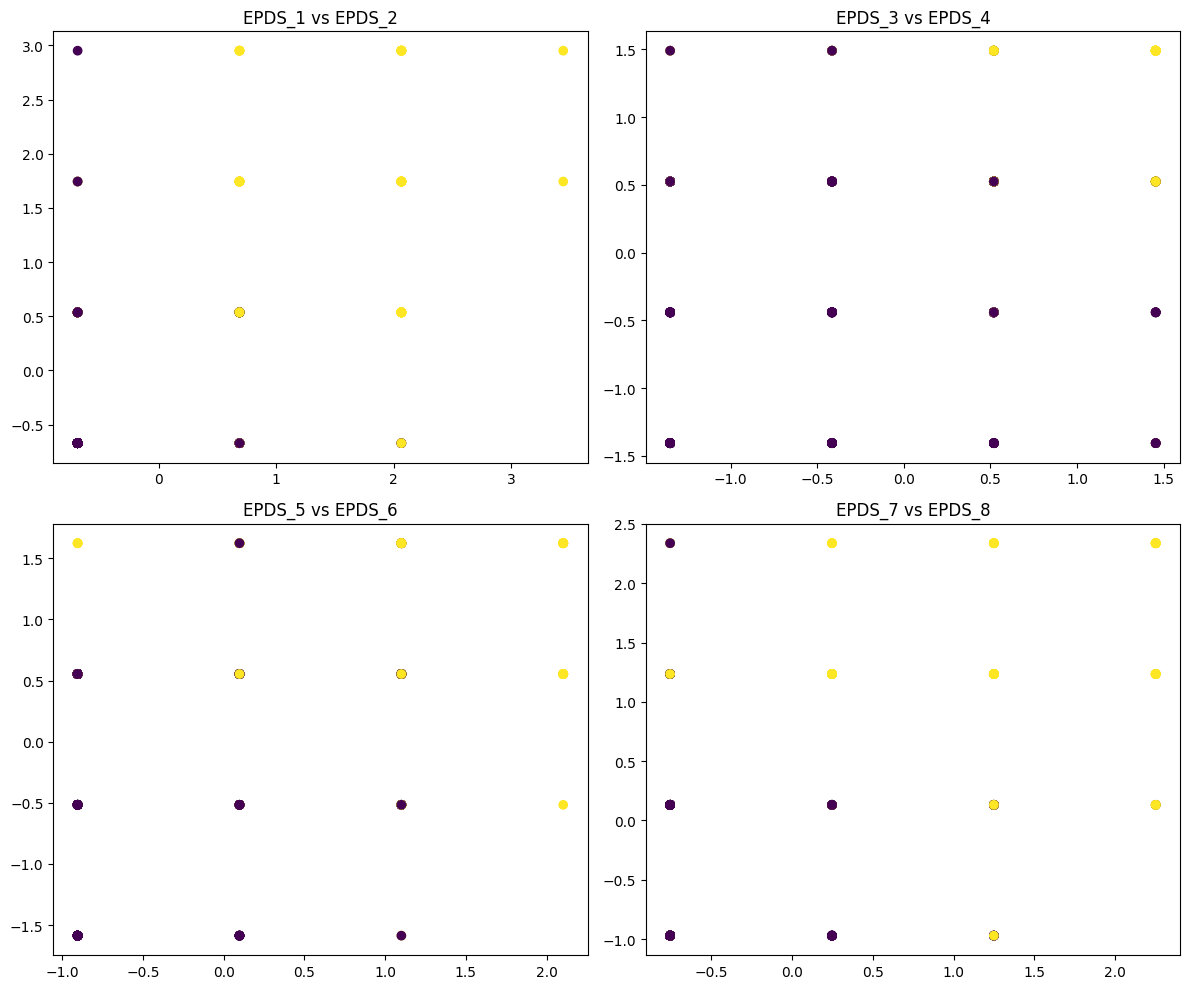

In [11]:
# 5. Visualização dos Clusters (se possível - para 2 dimensões)
# Se você tiver apenas 2 colunas em `df_scaled`, pode visualizar os clusters diretamente.
# Com 10 colunas, não podemos visualizar diretamente, mas podemos visualizar pares de colunas.
if df_scaled.shape[1] == 2:
    plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.title('Clusters K-means')
    plt.xlabel('EPDS_1 (Escalonado)')  # Substitua pelos nomes reais das colunas
    plt.ylabel('EPDS_2 (Escalonado)')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centróides')
    plt.legend()
    plt.show()
else:
    print("\nNão é possível visualizar os clusters diretamente com 10 dimensões.  Abaixo estão visualizações de alguns pares de colunas:")
    # Visualiza alguns pares de colunas para tentar entender os clusters
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.scatter(df_scaled['EPDS_1'], df_scaled['EPDS_2'], c=y_kmeans, cmap='viridis')
    plt.title('EPDS_1 vs EPDS_2')
    plt.subplot(2, 2, 2)
    plt.scatter(df_scaled['EPDS_3'], df_scaled['EPDS_4'], c=y_kmeans, cmap='viridis')
    plt.title('EPDS_3 vs EPDS_4')
    plt.subplot(2, 2, 3)
    plt.scatter(df_scaled['EPDS_5'], df_scaled['EPDS_6'], c=y_kmeans, cmap='viridis')
    plt.title('EPDS_5 vs EPDS_6')
    plt.subplot(2, 2, 4)
    plt.scatter(df_scaled['EPDS_7'], df_scaled['EPDS_8'], c=y_kmeans, cmap='viridis')
    plt.title('EPDS_7 vs EPDS_8')
    plt.tight_layout()
    plt.show()

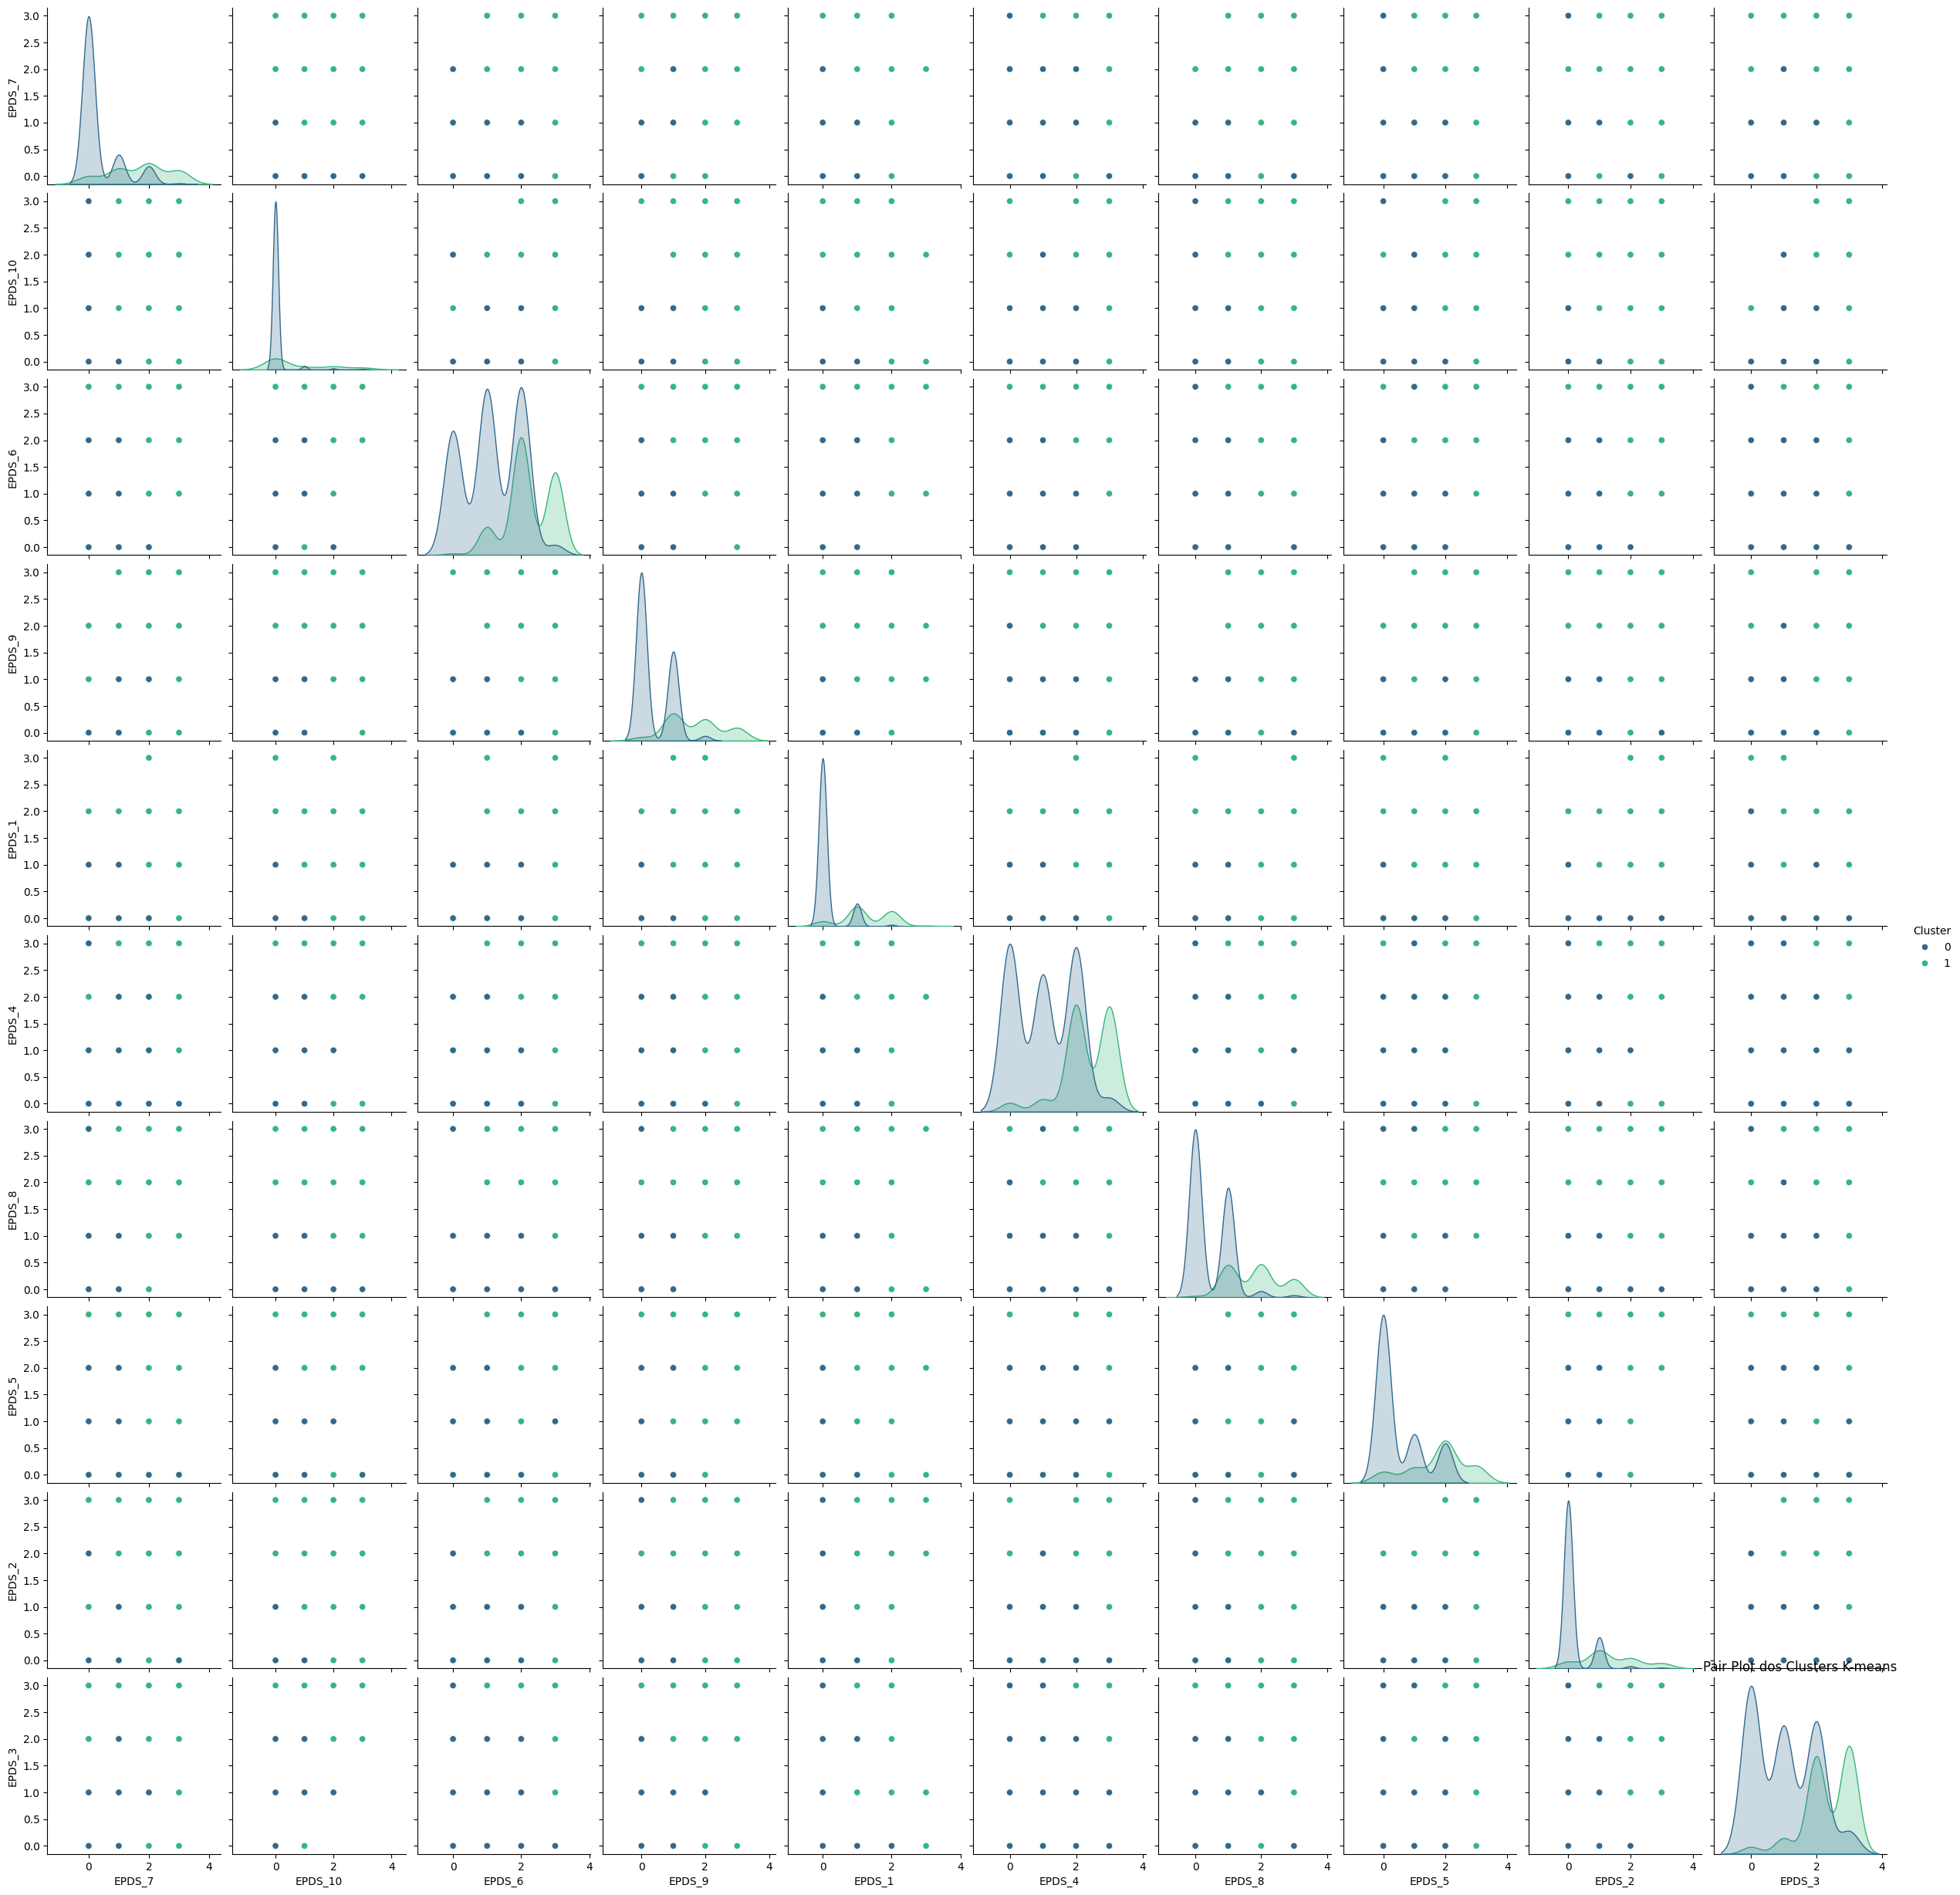

In [12]:
# 5. Visualização dos Clusters
# Se você tiver apenas 2 colunas em `df_scaled`, pode visualizar os clusters diretamente.
# Com mais de 2 colunas, não podemos visualizar os clusters em um único gráfico 2D.
# Uma alternativa é usar um Pair Plot para visualizar a relação entre pares de variáveis.
if df_scaled.shape[1] <= 2:
    # Se tivermos 2 ou menos dimensões, podemos fazer um gráfico de dispersão simples
    plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.title('Clusters K-means')
    plt.xlabel('EPDS_1 (Escalonado)')
    plt.ylabel('EPDS_2 (Escalonado)')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centróides')
    plt.legend()
    plt.show()
else:
    # Para mais de 2 dimensões, usamos Pair Plot
    sns.pairplot(df_epds, hue='Cluster', palette='viridis')
    plt.title('Pair Plot dos Clusters K-means')
    plt.show()

 **Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados e facilitar a visualização dos clusters do K-means**


Variância explicada pelas 2 componentes principais:
[0.55001957 0.08425977]
Total de variância explicada: 0.63


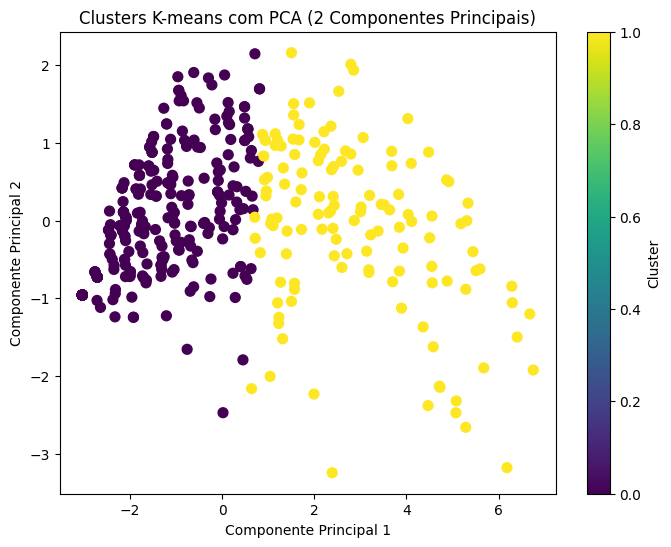

In [13]:
# 5. Visualização dos Clusters com PCA
# Aplicar PCA para reduzir a dimensionalidade para 2 componentes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
final_df = pd.concat([principal_df, df_epds['Cluster']], axis=1)

# Explicação da variância explicada pelo PCA
print("\nVariância explicada pelas 2 componentes principais:")
print(pca.explained_variance_ratio_)
print(f"Total de variância explicada: {pca.explained_variance_ratio_.sum():.2f}")

# Criar o gráfico de dispersão com os componentes principais e os clusters
plt.figure(figsize=(8, 6))
plt.scatter(final_df['Principal Component 1'], final_df['Principal Component 2'], c=final_df['Cluster'], cmap='viridis', s=50)
plt.title('Clusters K-means com PCA (2 Componentes Principais)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')  # Adiciona uma barra de cores para indicar os clusters
plt.show()


Silhouette Score (PCA + K-means): 0.532
Davies-Bouldin Index (PCA + K-means): 0.704
Adjusted Rand Index (PCA + K-means vs. Aleatório): 0.002


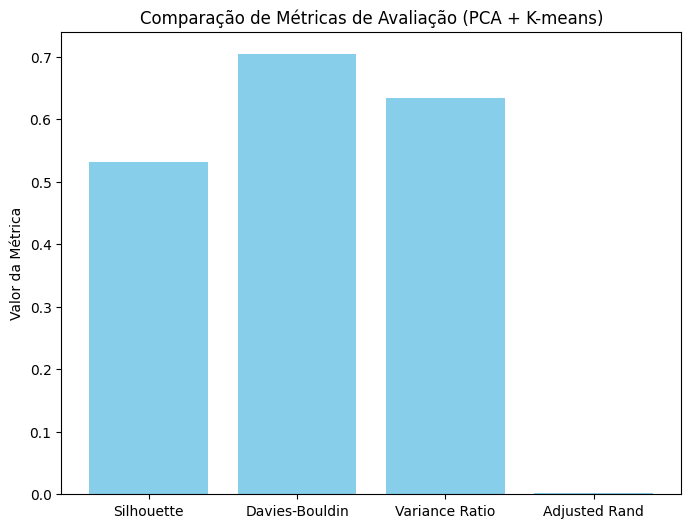

In [14]:
# 8. Métricas de Avaliação para K-means com PCA
# Calcular métricas após aplicar K-means nos dados transformados pelo PCA
if len(np.unique(y_kmeans)) > 1: # Verifica se há mais de um cluster
    silhouette_pca = silhouette_score(principal_components, y_kmeans)
    davies_bouldin_pca = davies_bouldin_score(principal_components, y_kmeans)
    #variance_ratio_pca = explained_variance_ratio.sum() # A razão da variância já foi calculada
    print(f"\nSilhouette Score (PCA + K-means): {silhouette_pca:.3f}")
    print(f"Davies-Bouldin Index (PCA + K-means): {davies_bouldin_pca:.3f}")
    #print(f"Variance Ratio Criterion (PCA): {variance_ratio_pca:.3f}")

    # Para o Adjusted Rand Index, precisamos de um "ground truth" (rótulos verdadeiros).
    # Como não temos isso, vamos gerar rótulos aleatórios para fins de demonstração.
    # Em uma aplicação real, você teria rótulos verdadeiros para comparar com os clusters do K-means.
    from sklearn.metrics import rand_score
    random_labels = np.random.randint(0, k, size=len(y_kmeans))  # Gera rótulos aleatórios
    adjusted_rand_pca = adjusted_rand_score(y_kmeans, random_labels)
    print(f"Adjusted Rand Index (PCA + K-means vs. Aleatório): {adjusted_rand_pca:.3f}")


    # Visualização das métricas
    plt.figure(figsize=(8, 6))
    metrics = ['Silhouette', 'Davies-Bouldin', 'Variance Ratio', 'Adjusted Rand']
    values = [silhouette_pca, davies_bouldin_pca, pca.explained_variance_ratio_.sum(), adjusted_rand_pca]
    plt.bar(metrics, values, color='skyblue')
    plt.title('Comparação de Métricas de Avaliação (PCA + K-means)')
    plt.ylabel('Valor da Métrica')
    plt.show()
else:
    print("\nNão é possível calcular as métricas de avaliação para K-means com PCA pois foi encontrado apenas 1 cluster.")



# Função para gerar os plots de comparação de métricas (semelhante à imagem fornecida)
def plot_metric_comparison(datasets, clustering_results, metric_names):
    """
    Gera uma visualização comparando o desempenho de diferentes algoritmos de clusterização
    em diferentes conjuntos de dados, usando várias métricas de avaliação.

    Args:
        datasets (list of str): Nomes dos conjuntos de dados.
        clustering_results (dict): Dicionário contendo os resultados da clusterização para cada dataset e algoritmo.
            Exemplo:
            {
                'Dataset1': {
                    'KMeans': {'Silhouette': 0.8, 'Davies-Bouldin': 0.5, 'ARI': 0.9},
                    'Agglomerative': {'Silhouette': 0.7, 'Davies-Bouldin': 0.6, 'ARI': 0.8},
                    'DBSCAN': {'Silhouette': 0.2, 'Davies-Bouldin': 1.2, 'ARI': 0.3},
                },
                'Dataset2': {
                    'KMeans': {'Silhouette': 0.6, 'Davies-Bouldin': 0.7, 'ARI': 0.7},
                    'Agglomerative': {'Silhouette': 0.5, 'Davies-Bouldin': 0.8, 'ARI': 0.6},
                    'DBSCAN': {'Silhouette': 0.9, 'Davies-Bouldin': 0.3, 'ARI': 0.2},
                },
                ...
            }
        metric_names (list of str): Nomes das métricas a serem plotadas.

    """
    n_datasets = len(datasets)
    n_metrics = len(metric_names)
    n_algorithms = len(clustering_results[datasets[0]])  # Assume que todos os datasets têm os mesmos algoritmos

    fig, axes = plt.subplots(n_metrics, n_datasets, figsize=(15, 10), sharex='col', sharey='row')
    fig.subplots_adjust(wspace=0.1, hspace=0.3)  # Ajustar espaçamento entre subplots

    algorithm_names = list(clustering_results[datasets[0]].keys())
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Cores para KMeans, Agglomerative, DBSCAN

    for i, metric in enumerate(metric_names):
        for j, dataset in enumerate(datasets):
            ax = axes[i, j]
            values = [clustering_results[dataset][algo][metric] for algo in algorithm_names]
            # Barra vertical
            ax.bar(algorithm_names, values, color=colors) #plotar os valores das métricas para cada algoritmo
            if i == 0:
                ax.set_title(dataset)  # Título do dataset na primeira linha
            if j == 0:
                ax.set_ylabel(metric)  # Rótulo da métrica na primeira coluna
            ax.tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

    # Adicionar legenda fora dos subplots
    handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(n_algorithms)]
    fig.legend(handles, algorithm_names, loc='upper center', ncol=n_algorithms, bbox_to_anchor=(0.5, 0.05)) #posicionar a legenda

    plt.tight_layout()  # Ajustar layout para evitar sobreposição
    plt.show()
